In [1]:
import numpy as np
import sxs
import scipy
import gw_eccentricity
import matplotlib.pyplot as plt
import os
import sys
sys.path.insert(0, "./tools")
import loading
import decomposition
from importlib import reload
reload(loading)
reload(decomposition)

/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/gw_eccentricity/load_data.py:6: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


<module 'decomposition' from '/urania/u/pjn/gitrepos/EccentricWaveformDecomposition/tools/decomposition.py'>

In [2]:
IDs = [str(x).zfill(2) for x in range(1, 13)]
IDs.append("90")

N_runs = np.size(IDs)
extrapolation_order = 2
project = "SurveyMeanAno_v2"
wfs, metadata, horizon = loading.LoadData(IDs, extrapolation_order, project)
h22 = loading.RestrictTo22and20Mode(wfs, IDs)
h22_total = loading.CutJunk(h22, IDs, junk_time=2000)
h22 = loading.RestrictToFirstPeriastron(h22, IDs)
h22 = loading.RestrictToInspiral(h22, IDs)
h22 = loading.Align(h22, IDs)
h22 = loading.AddQCData(h22)
h22 = decomposition.AddMeanAnomalyDomain(h22, IDs, periastron_definition="QC", include_ends=True)
h22 = loading.AddA22andPhi22(h22, IDs)

In [52]:
e, l = decomposition.MeasureReferenceEccandMeanAno(h22, IDs)
l_array = np.zeros(N_runs)
for i in range(N_runs):
    l_array[i] = l[IDs[i]]

/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/gw_eccentricity/eccDefinition.py:1788: UserWarning: egw(t) is nonmonotonic in the range [-226.4314956497019, -83.13149564918058]
For more verbose output use `debug_level=1`.
  debug_message(message, self.debug_level,
/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/gw_eccentricity/eccDefinition.py:1788: UserWarning: egw(t) is nonmonotonic in the range [-246.18430465283564, -98.18430465229721]
For more verbose output use `debug_level=1`.
  debug_message(message, self.debug_level,
/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/gw_eccentricity/eccDefinition.py:1788: UserWarning: egw(t) is nonmonotonic in the range [-270.3688228555566, -119.06882285500615]
For more verbose output use `debug_level=1`.
  debug_message(message, self.debug_level,
/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/gw_eccentricity/eccDefinition.py:1788: UserWarning: egw(t) is nonmonotonic in the range [-284.4939879801459, -133.49398

In [53]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
norm = mcolors.Normalize(vmin=0, vmax=2*np.pi)
mappable = cm.ScalarMappable(norm=norm, cmap='twilight')

Text(0, 0.5, 'A22')

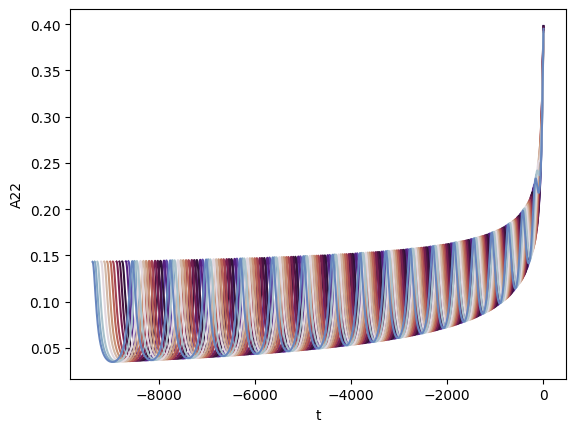

In [54]:
for k in range(N_runs):
    plt.plot(h22[IDs[k]]["t"], np.abs(h22[IDs[k]]["h22"]), color=mappable.to_rgba(l[IDs[k]]))
plt.xlabel("t")
# plt.plot(h22["QC"]["t"], np.abs(h22["QC"]["h22"]))
plt.ylabel("A22")

(-1000.0, 0.0)

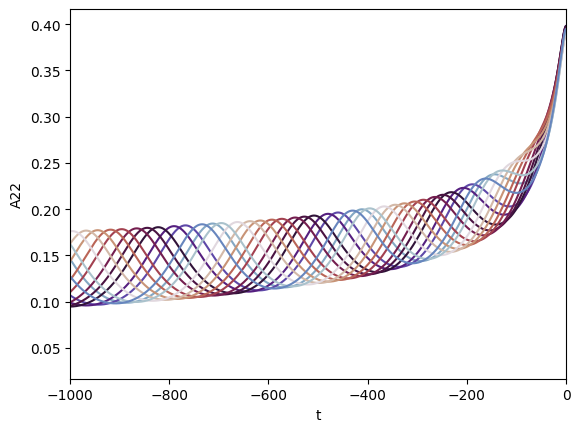

In [55]:
for k in range(N_runs):
    plt.plot(h22[IDs[k]]["t"], np.abs(h22[IDs[k]]["A22"]), color=mappable.to_rgba(l[IDs[k]]))
plt.xlabel("t")
plt.ylabel("A22")
plt.xlim(-1000, 0)

<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_105124/995516950.py:4: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel("$\ell$")


Text(0, 0.5, '$\\ell$')

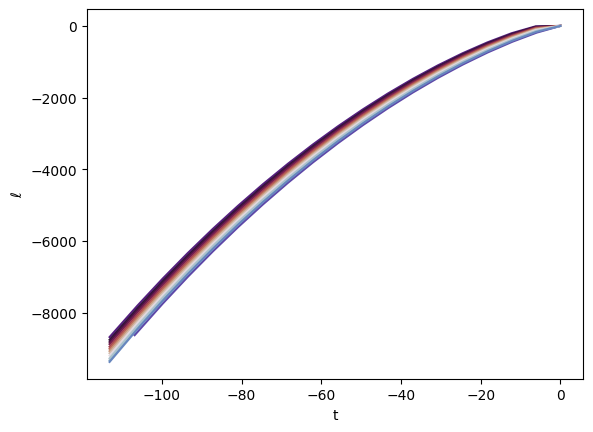

In [56]:
for k in range(N_runs):
    plt.plot(h22[IDs[k]]["MeanAno"], h22[IDs[k]]["t"], color=mappable.to_rgba(l[IDs[k]]))
plt.xlabel("t")
plt.ylabel("$\ell$")

<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_105124/490041473.py:4: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel("$\ell$")


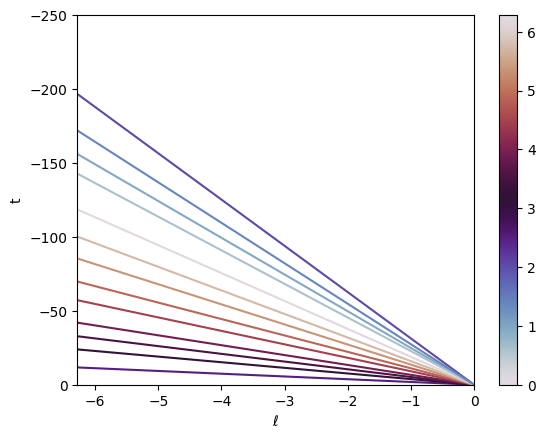

In [57]:
fig, ax = plt.subplots()
for k in range(N_runs):
    plt.plot(h22[IDs[k]]["MeanAno"], h22[IDs[k]]["t"], color=mappable.to_rgba(l[IDs[k]]))
plt.xlabel("$\ell$")
plt.ylabel("t")
plt.xlim(-2*np.pi, 0)
plt.ylim(0, -250)
plt.colorbar(mappable=mappable, ax=ax)

<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_105124/3449016621.py:4: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel("$\ell$")


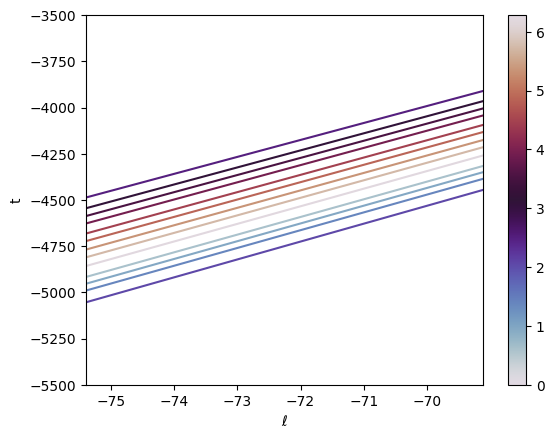

In [58]:
fig, ax = plt.subplots()
for k in range(N_runs):
    plt.plot(h22[IDs[k]]["MeanAno"], h22[IDs[k]]["t"], color=mappable.to_rgba(l[IDs[k]]))
plt.xlabel("$\ell$")
plt.ylabel("t")
plt.xlim(-24*np.pi, -22*np.pi)
plt.ylim(-5500, -3500)
plt.colorbar(mappable=mappable, ax=ax)

<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_105124/1630293458.py:4: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel("$\ell$")


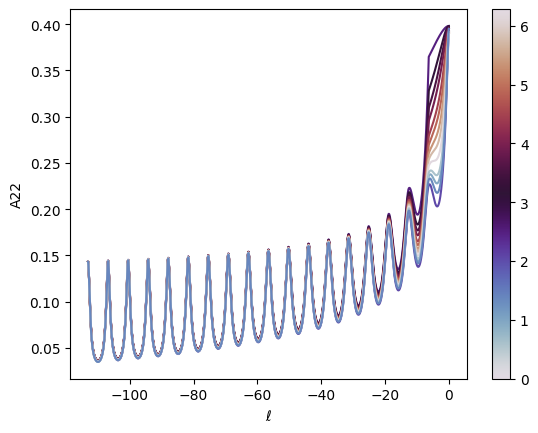

In [59]:
fig, ax = plt.subplots()
for k in range(N_runs):
    plt.plot(h22[IDs[k]]["MeanAno"], h22[IDs[k]]["A22"], color=mappable.to_rgba(l[IDs[k]]))
plt.xlabel("$\ell$")
plt.ylabel("A22")
plt.colorbar(mappable=mappable, ax=ax)

<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_105124/2459865668.py:4: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel("$\ell$")


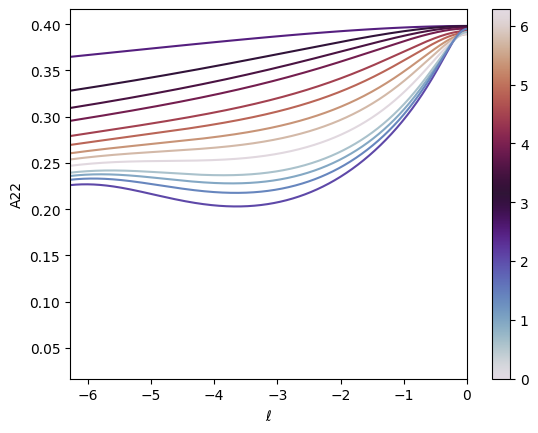

In [60]:
fig, ax = plt.subplots()
for k in range(N_runs):
    plt.plot(h22[IDs[k]]["MeanAno"], np.abs(h22[IDs[k]]["h22"]), color=mappable.to_rgba(l[IDs[k]]))
plt.xlabel("$\ell$")
plt.ylabel("A22")
plt.xlim(-2*np.pi, 0)
plt.colorbar(mappable=mappable, ax=ax)

<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_105124/2122776830.py:4: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel("$\ell$")


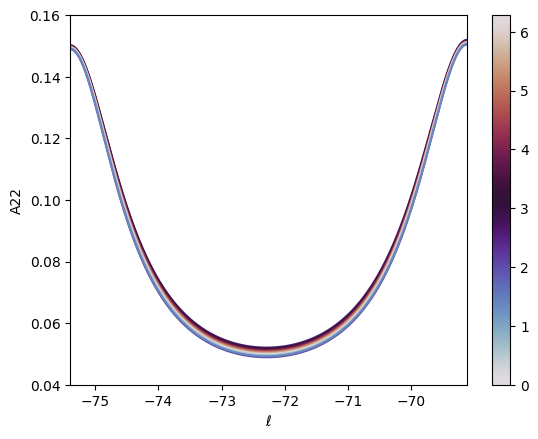

In [61]:
fig, ax = plt.subplots()
for k in range(N_runs):
    plt.plot(h22[IDs[k]]["MeanAno"], np.abs(h22[IDs[k]]["h22"]), color=mappable.to_rgba(l[IDs[k]]))
plt.xlabel("$\ell$")
plt.ylabel("A22")
plt.xlim(-24*np.pi, -22*np.pi)
plt.ylim(0.04, 0.16)
plt.colorbar(mappable=mappable, ax=ax)

<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_105124/2664279651.py:4: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel("$\ell$")


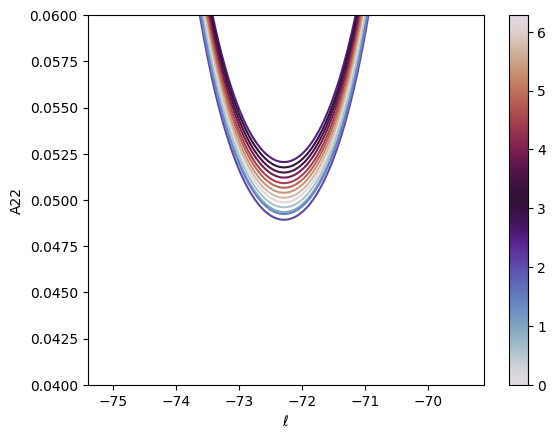

In [62]:
fig, ax = plt.subplots()
for k in range(N_runs):
    plt.plot(h22[IDs[k]]["MeanAno"], np.abs(h22[IDs[k]]["h22"]), color=mappable.to_rgba(l[IDs[k]]))
plt.xlabel("$\ell$")
plt.ylabel("A22")
plt.xlim(-24*np.pi, -22*np.pi)
plt.ylim(0.04, 0.16)
plt.ylim(0.04, 0.06)
plt.colorbar(mappable=mappable, ax=ax)

<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_105124/2491414695.py:4: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel("$\ell$")


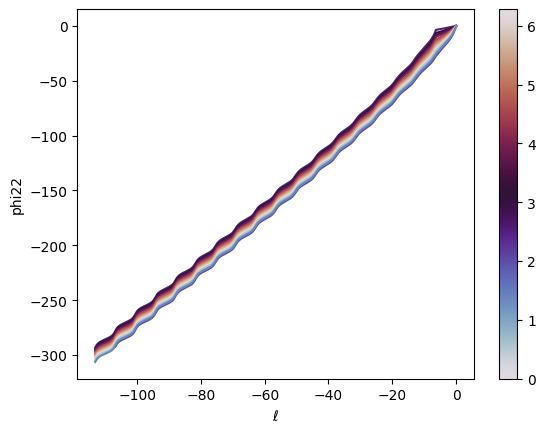

In [63]:
fig, ax = plt.subplots()
for k in range(N_runs):
    plt.plot(h22[IDs[k]]["MeanAno"], h22[IDs[k]]["phi22"], color=mappable.to_rgba(l[IDs[k]]))
plt.xlabel("$\ell$")
plt.ylabel("phi22")
plt.colorbar(mappable=mappable, ax=ax)

<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_105124/3240580632.py:4: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel("$\ell$")


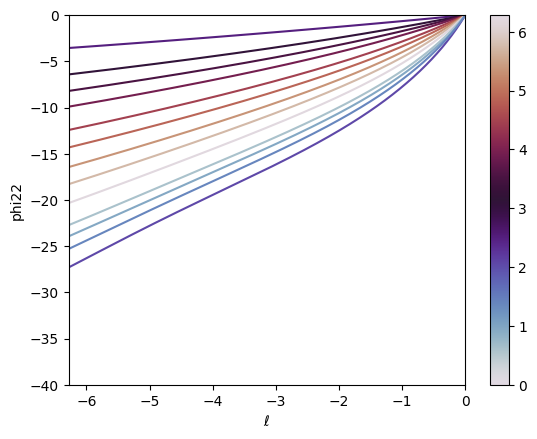

In [64]:
fig, ax = plt.subplots()
for k in range(N_runs):
    plt.plot(h22[IDs[k]]["MeanAno"], h22[IDs[k]]["phi22"], color=mappable.to_rgba(l[IDs[k]]))
plt.xlabel("$\ell$")
plt.ylabel("phi22")
plt.xlim(-2*np.pi, 0)
plt.ylim(-40, 0)
plt.colorbar(mappable=mappable, ax=ax)

<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_105124/278325991.py:4: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel("$\ell$")


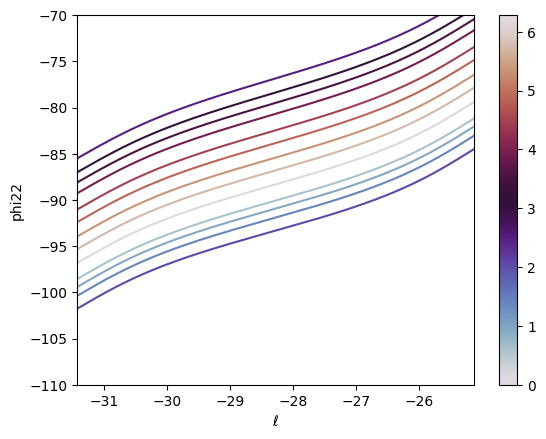

In [65]:
fig, ax = plt.subplots()
for k in range(N_runs):
    plt.plot(h22[IDs[k]]["MeanAno"], h22[IDs[k]]["phi22"], color=mappable.to_rgba(l[IDs[k]]))
plt.xlabel("$\ell$")
plt.ylabel("phi22")
plt.xlim(-10*np.pi, -8*np.pi)
plt.ylim(-110, -70)
plt.colorbar(mappable=mappable, ax=ax)

In [66]:
sys.path.insert(0, "/u/pjn/gitrepos/pySurrogate/master")
import pySurrogate as pySur
%matplotlib inline

In [72]:
# Setup the domain
h22 = decomposition.InterpolateToUniformMeanAnomalyDomain(h22, IDs, l_max=0)
meanano_domain = h22[IDs[0]]["MeanAno_uniform"]

# Make a DataModeler object as our surrogate
sur_amp = pySur.DataModeler(meanano_domain, "Amplitude_surrogate")
sur_phi = pySur.DataModeler(meanano_domain, "Phase_surrogate")
sur_t = pySur.DataModeler(meanano_domain, "Time_surrogate")

# Add the data
for i, w in enumerate(IDs):
    sur_amp.addKnownDataSet(np.array([l_array[i]]), h22[w]["A22_uniform"])
    sur_phi.addKnownDataSet(np.array([l_array[i]]), h22[w]["phi22_uniform"])
    sur_t.addKnownDataSet(np.array([l_array[i]]), h22[w]["t_uniform"])
    
plotdir='test_surrogate'
# Build a reduced basis and empirical interpolant
# The plotDir key is used to provide a folder to save emperical interpolant construction plots
sur_amp.createEmpiricalInterpolant(basisTol=1e-4, plotOpts = {'plotDir': plotdir+"_amp"})
sur_phi.createEmpiricalInterpolant(basisTol=1e-2, plotOpts = {'plotDir': plotdir+"_phi"})
sur_t.createEmpiricalInterpolant(basisTol=1e-2, plotOpts = {'plotDir': plotdir+"_t"})

# Setup fits - these options will be remembered for all fits unless we override them
sur_amp.setupFits(minVals=[0], maxVals=[2*np.pi], fitType='GPR')
sur_phi.setupFits(minVals=[0], maxVals=[2*np.pi], fitType='GPR')
sur_t.setupFits(minVals=[0], maxVals=[2*np.pi], fitType='GPR')

# Fit the data
sur_amp.fit()
sur_phi.fit()
sur_t.fit()

Creating a float64 pySur RB/EI from 13 data sets with tol 0.0001 for Amplitude_surrogate
...got 5 basis elements
Plotting basis for Amplitude_surrogate


/u/pjn/gitrepos/pySurrogate/master/pySurrogate/dataModeler.py:345: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(split_time, self.domain[-1])


Creating a float64 pySur RB/EI from 13 data sets with tol 0.01 for Phase_surrogate
...got 5 basis elements
Plotting basis for Phase_surrogate
Creating a float64 pySur RB/EI from 13 data sets with tol 0.01 for Time_surrogate
...got 13 basis elements
Plotting basis for Time_surrogate
Amplitude_surrogate is fitting 5 nodes


/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/u/pjn/conda-envs/surrogate/lib/python3.12/site-p

Phase_surrogate is fitting 5 nodes


/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/u/pjn/conda-envs/surrogate/lib/python3.12/site-p

Time_surrogate is fitting 13 nodes


/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/u/pjn/conda-envs/surrogate/lib/python3.12/site-p

In [73]:
err = np.zeros(np.size(IDs))
for i, w in enumerate(IDs):
    exact_sol = h22[w]["A22_uniform"]
    sur_eval = sur_amp(np.array([l_array[i]]))
    err[i] = max(abs(exact_sol - sur_eval))
    
print(f'Max training space LInf error: {max(err)} at {IDs[np.argmax(err)]}')


err = np.zeros(np.size(IDs))
for i, w in enumerate(IDs):
    exact_sol = h22[w]["phi22_uniform"]
    sur_eval = sur_phi(np.array([l_array[i]]))
    err[i] = max(abs(exact_sol - sur_eval))
    
print(f'Max training space LInf error: {max(err)} at {IDs[np.argmax(err)]}')
err = np.zeros(np.size(IDs))
for i, w in enumerate(IDs):
    exact_sol = h22[w]["t_uniform"]
    sur_eval = sur_t(np.array([l_array[i]]))
    err[i] = max(abs(exact_sol - sur_eval))
    
print(f'Max training space LInf error: {max(err)} at {IDs[np.argmax(err)]}')

Max training space LInf error: 0.0006171200522371023 at 10
Max training space LInf error: 0.04314206721997493 at 10
Max training space LInf error: 7.24204064681544e-05 at 03


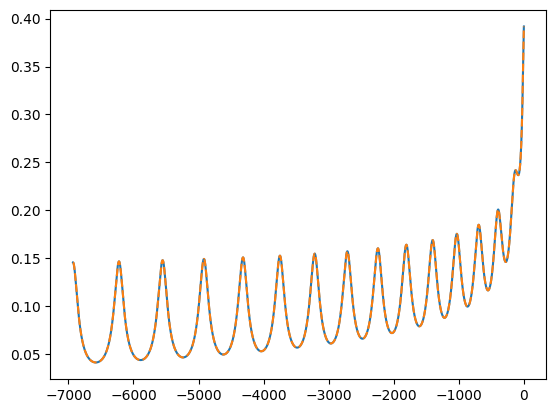

In [74]:
sur_eval_A = sur_amp(np.array([l_array[-2]]))
sur_eval_t = sur_t(np.array([l_array[-2]]))
plt.plot(h22["12"]["t_uniform"], h22["12"]["A22_uniform"])
plt.plot(sur_eval_t, sur_eval_A, '--')
plt.show()

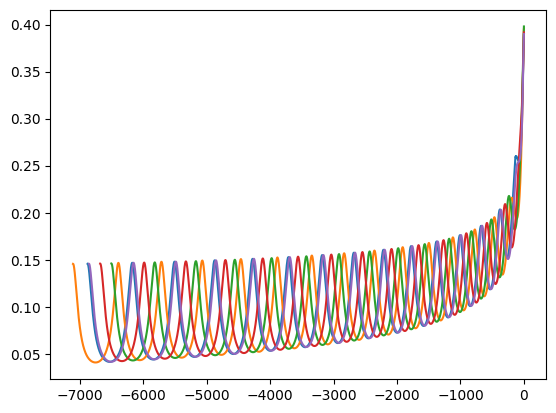

In [75]:
for l0 in np.linspace(0, 2*np.pi, 5, endpoint=True):
    sur_eval_A = sur_amp(np.array([l0]))
    sur_eval_t = sur_t(np.array([l0]))
    plt.plot(sur_eval_t, sur_eval_A)
plt.show()

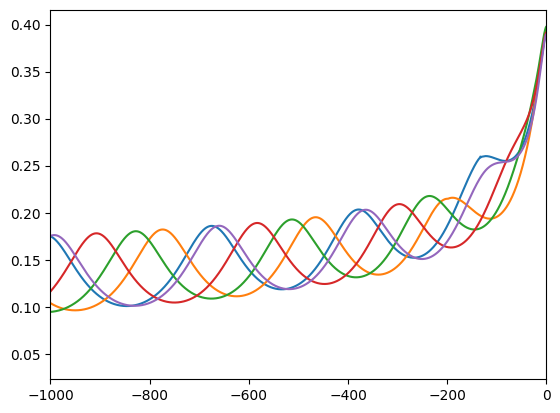

In [76]:
for l0 in np.linspace(0, 2*np.pi, 5, endpoint=True):
    sur_eval_A = sur_amp(np.array([l0]))
    sur_eval_t = sur_t(np.array([l0]))
    plt.plot(sur_eval_t, sur_eval_A)
plt.xlim(-1000, 0)
plt.show()

In [78]:
# Setup the domain
h22 = decomposition.InterpolateToUniformMeanAnomalyDomain(h22, IDs, l_max=-4*np.pi)
meanano_domain = h22[IDs[0]]["MeanAno_uniform"]

# Make a DataModeler object as our surrogate
sur_amp = pySur.DataModeler(meanano_domain, "Amplitude_surrogate")
sur_phi = pySur.DataModeler(meanano_domain, "Phase_surrogate")
sur_t = pySur.DataModeler(meanano_domain, "Time_surrogate")

# Add the data
for i, w in enumerate(IDs):
    sur_amp.addKnownDataSet(np.array([l_array[i]]), h22[w]["A22_uniform"])
    sur_phi.addKnownDataSet(np.array([l_array[i]]), h22[w]["phi22_uniform"])
    sur_t.addKnownDataSet(np.array([l_array[i]]), h22[w]["t_uniform"])
    
plotdir='test_surrogate'
# Build a reduced basis and empirical interpolant
# The plotDir key is used to provide a folder to save emperical interpolant construction plots
sur_amp.createEmpiricalInterpolant(basisTol=1e-4, plotOpts = {'plotDir': plotdir+"_amp"})
sur_phi.createEmpiricalInterpolant(basisTol=1e-2, plotOpts = {'plotDir': plotdir+"_phi"})
sur_t.createEmpiricalInterpolant(basisTol=1e-1, plotOpts = {'plotDir': plotdir+"_t"})

# Setup fits - these options will be remembered for all fits unless we override them
sur_amp.setupFits(minVals=[0], maxVals=[2*np.pi], fitType='GPR')
sur_phi.setupFits(minVals=[0], maxVals=[2*np.pi], fitType='GPR')
sur_t.setupFits(minVals=[0], maxVals=[2*np.pi], fitType='GPR')

# Fit the data
sur_amp.fit()
sur_phi.fit()
sur_t.fit()

Creating a float64 pySur RB/EI from 13 data sets with tol 0.0001 for Amplitude_surrogate
...got 4 basis elements
Plotting basis for Amplitude_surrogate


/u/pjn/gitrepos/pySurrogate/master/pySurrogate/dataModeler.py:345: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(split_time, self.domain[-1])


Creating a float64 pySur RB/EI from 13 data sets with tol 0.01 for Phase_surrogate
...got 3 basis elements
Plotting basis for Phase_surrogate
Creating a float64 pySur RB/EI from 13 data sets with tol 0.1 for Time_surrogate
...got 5 basis elements
Plotting basis for Time_surrogate
Amplitude_surrogate is fitting 4 nodes


/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/u/pjn/conda-envs/surrogate/lib/python3.12/site-p

Phase_surrogate is fitting 3 nodes


/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Time_surrogate is fitting 5 nodes


/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/u/pjn/conda-envs/surrogate/lib/python3.12/site-p

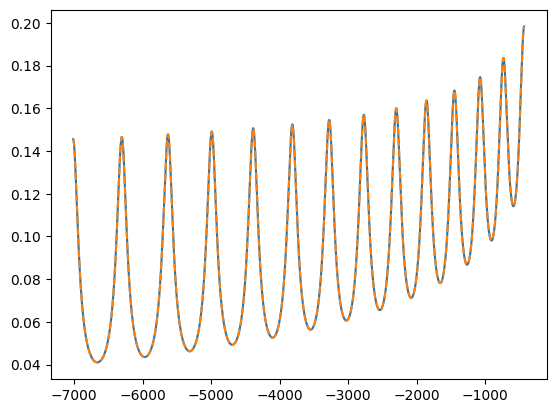

In [79]:
sur_eval_A = sur_amp(np.array([l_array[-1]]))
sur_eval_t = sur_t(np.array([l_array[-1]]))
plt.plot(h22[IDs[-1]]["t_uniform"], h22[IDs[-1]]["A22_uniform"])
plt.plot(sur_eval_t, sur_eval_A, '--')
plt.show()

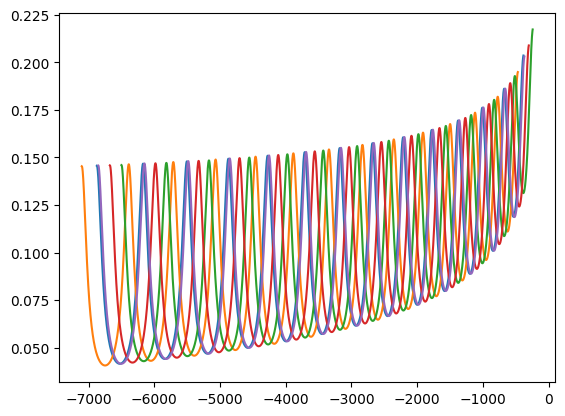

In [80]:
for l0 in np.linspace(0, 2*np.pi, 5, endpoint=True):
    sur_eval_A = sur_amp(np.array([l0]))
    sur_eval_t = sur_t(np.array([l0]))
    plt.plot(sur_eval_t, sur_eval_A)
plt.show()

In [36]:
# Setup the domain
h22 = decomposition.InterpolateToUniformMeanAnomalyDomain(h22, IDs, l_max=-4*np.pi)
meanano_domain = h22[IDs[0]]["MeanAno_uniform"]

# Make a DataModeler object as our surrogate
sur_amp = pySur.DataModeler(meanano_domain, "Amplitude_surrogate")
sur_phi = pySur.DataModeler(meanano_domain, "Phase_surrogate")
sur_t = pySur.DataModeler(meanano_domain, "Time_surrogate")

# Add the data
for i, w in enumerate(IDs[:-1]):
    sur_amp.addKnownDataSet(np.array([l_array[i]]), h22[w]["A22_uniform"])
    sur_phi.addKnownDataSet(np.array([l_array[i]]), h22[w]["phi22_uniform"])
    sur_t.addKnownDataSet(np.array([l_array[i]]), h22[w]["t_uniform"])
    
plotdir='test_surrogate'
# Build a reduced basis and empirical interpolant
# The plotDir key is used to provide a folder to save emperical interpolant construction plots
sur_amp.createEmpiricalInterpolant(basisTol=1e-4, plotOpts = {'plotDir': plotdir+"_amp"})
sur_phi.createEmpiricalInterpolant(basisTol=1e-2, plotOpts = {'plotDir': plotdir+"_phi"})
sur_t.createEmpiricalInterpolant(basisTol=1e-1, plotOpts = {'plotDir': plotdir+"_t"})

# Setup fits - these options will be remembered for all fits unless we override them
sur_amp.setupFits(minVals=[min_l], maxVals=[max_l], fitType='GPR')
sur_phi.setupFits(minVals=[min_l], maxVals=[max_l], fitType='GPR')
sur_t.setupFits(minVals=[min_l], maxVals=[max_l], fitType='GPR')

# Fit the data
sur_amp.fit()
sur_phi.fit()
sur_t.fit()

Creating a float64 pySur RB/EI from 12 data sets with tol 0.0001 for Amplitude_surrogate
...got 4 basis elements
Plotting basis for Amplitude_surrogate


/u/pjn/gitrepos/pySurrogate/master/pySurrogate/dataModeler.py:345: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(split_time, self.domain[-1])


Creating a float64 pySur RB/EI from 12 data sets with tol 0.01 for Phase_surrogate
...got 3 basis elements
Plotting basis for Phase_surrogate
Creating a float64 pySur RB/EI from 12 data sets with tol 0.1 for Time_surrogate
...got 5 basis elements
Plotting basis for Time_surrogate
Amplitude_surrogate is fitting 4 nodes


/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Phase_surrogate is fitting 3 nodes


/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Time_surrogate is fitting 5 nodes


/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/u/pjn/conda-envs/surrogate/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-07. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/u/pjn/conda-envs/surrogate/lib/python3.12/site-p

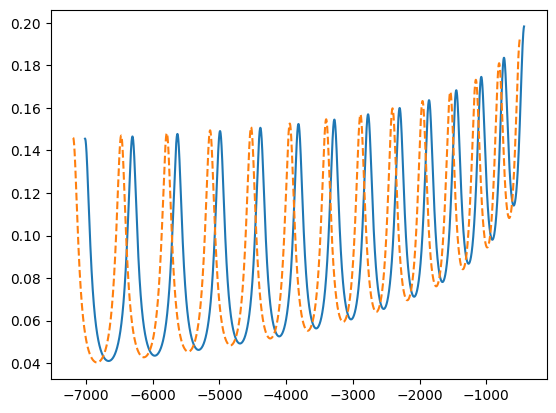

0.6781350018459716


In [37]:
sur_eval_A = sur_amp(np.array([l_array[-1]]))
sur_eval_t = sur_t(np.array([l_array[-1]]))
plt.plot(h22[IDs[-1]]["t_uniform"], h22[IDs[-1]]["A22_uniform"])
plt.plot(sur_eval_t, sur_eval_A, '--')
plt.show()
print(np.linalg.norm(sur_eval_A-h22[IDs[-1]]["A22_uniform"]))

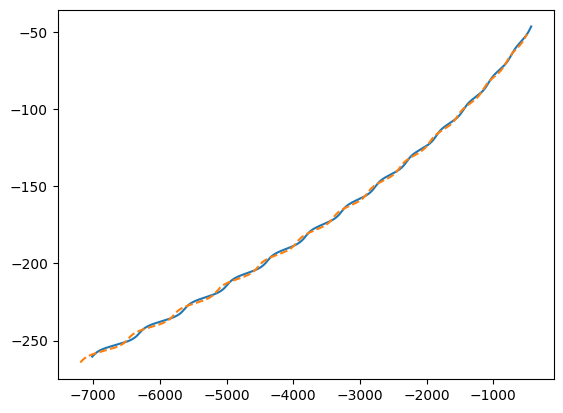

In [38]:
sur_eval_A = sur_phi(np.array([l_array[-1]]))
sur_eval_t = sur_t(np.array([l_array[-1]]))
plt.plot(h22[IDs[-1]]["t_uniform"], h22[IDs[-1]]["phi22_uniform"])
plt.plot(sur_eval_t, sur_eval_A, '--')
plt.show()

In [202]:
bad_l = l_array+np.pi
bad_l = np.mod(bad_l, 2*np.pi)
l_min = np.min(bad_l)
l_max = np.max(bad_l)

In [205]:
# Setup the domain
h22 = decomposition.InterpolateToUniformMeanAnomalyDomain(h22, IDs, l_max=-2*np.pi)
meanano_domain = h22[IDs[0]]["MeanAno_uniform"]

# Make a DataModeler object as our surrogate
sur_amp = pySur.DataModeler(meanano_domain, "Amplitude_surrogate")
sur_phi = pySur.DataModeler(meanano_domain, "Phase_surrogate")
sur_t = pySur.DataModeler(meanano_domain, "Time_surrogate")

# Add the data
for i, w in enumerate(IDs):
    sur_amp.addKnownDataSet(np.array([bad_l[i]]), h22[w]["A22_uniform"])
    sur_phi.addKnownDataSet(np.array([bad_l[i]]), h22[w]["phi22_uniform"])
    sur_t.addKnownDataSet(np.array([bad_l[i]]), h22[w]["t_uniform"])
    
plotdir='test_surrogate'
# Build a reduced basis and empirical interpolant
# The plotDir key is used to provide a folder to save emperical interpolant construction plots
sur_amp.createEmpiricalInterpolant(basisTol=1e-4, plotOpts = {'plotDir': plotdir+"_amp"})
sur_phi.createEmpiricalInterpolant(basisTol=1e-2, plotOpts = {'plotDir': plotdir+"_phi"})
sur_t.createEmpiricalInterpolant(basisTol=1e-1, plotOpts = {'plotDir': plotdir+"_t"})

# Setup fits - these options will be remembered for all fits unless we override them
sur_amp.setupFits(minVals=[l_min], maxVals=[l_max], absTol=1.e-10)
sur_phi.setupFits(minVals=[l_min], maxVals=[l_max], absTol=1.e-10)
sur_t.setupFits(minVals=[l_min], maxVals=[l_max], absTol=1.e-10)

# Fit the data
sur_amp.fit()
sur_phi.fit()
sur_t.fit()

Creating a float64 pySur RB/EI from 13 data sets with tol 0.0001 for Amplitude_surrogate
...got 5 basis elements
Plotting basis for Amplitude_surrogate


/u/pjn/gitrepos/pySurrogate/master/pySurrogate/dataModeler.py:345: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(split_time, self.domain[-1])


Creating a float64 pySur RB/EI from 13 data sets with tol 0.01 for Phase_surrogate
...got 5 basis elements
Plotting basis for Phase_surrogate
Creating a float64 pySur RB/EI from 13 data sets with tol 0.1 for Time_surrogate
...got 5 basis elements
Plotting basis for Time_surrogate
Amplitude_surrogate is fitting 5 nodes
Phase_surrogate is fitting 5 nodes
Time_surrogate is fitting 5 nodes


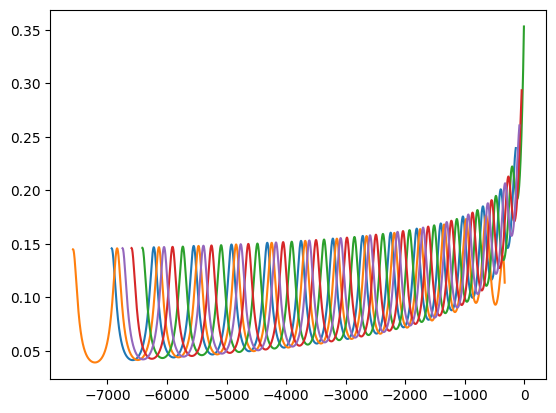

In [206]:
for l0 in np.linspace(l_min, l_max, 5, endpoint=False):
    sur_eval_A = sur_amp(np.array([l0]))
    sur_eval_t = sur_t(np.array([l0]))
    plt.plot(sur_eval_t, sur_eval_A)
plt.show()